# Importing libraries

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from pandasai import Agent
from pandasai.llm.local_llm import LocalLLM

# Downloading dataset

In [2]:
# !kaggle datasets download -d khushikhushikhushi/imdb-top-rated-tv-series-dataset

In [3]:
# with zipfile.ZipFile('imdb-top-rated-tv-series-dataset.zip', 'r') as file:
#     file.extractall('imdb-top-rated-tv-series-dataset')

# Exploring dataset

In [4]:
df = pd.read_csv('imdb-top-rated-tv-series-dataset/IMDb Top TV Series.csv')
df.head()

,Title,Year,Parental Rating,Rating,Number of Votes,Description
0,1. Game of Thrones,2011–2019,TV-MA,9.2,2.3M,Nine noble families fight for control over the...
1,2. Breaking Bad,2008–2013,TV-MA,9.5,2.1M,A chemistry teacher diagnosed with inoperable ...
2,3. Stranger Things,2016–2025,TV-14,8.7,1.3M,"When a young boy vanishes, a small town uncove..."
3,4. Friends,1994–2004,TV-14,8.9,1.1M,Follows the personal and professional lives of...
4,5. The Walking Dead,2010–2022,TV-MA,8.1,1.1M,Sheriff Deputy Rick Grimes wakes up from a com...


In [5]:
df.shape[1]

6

In [6]:
df.drop_duplicates('Title').count().iloc[0]

900

In [7]:
df.drop_duplicates('Parental Rating').count().iloc[2]

12

# Explarotary data analysis

In [8]:
df.sort_values('Rating', ascending=False).head(5)

,Title,Year,Parental Rating,Rating,Number of Votes,Description
1,2. Breaking Bad,2008–2013,TV-MA,9.5,2.1M,A chemistry teacher diagnosed with inoperable ...
389,390. Sapne Vs Everyone,NaN,NaN,9.4,66K,Two obsessive dreamers collide with the resist...
812,813. Bluey,2018–,TV-Y,9.4,29K,The slice-of-life adventures of an Australian ...
44,45. Avatar: The Last Airbender,2005–2008,TV-Y7-FV,9.3,376K,"In a war-torn world of elemental powers, a you..."
43,44. The Wire,2002–2008,TV-MA,9.3,379K,"The Baltimore drug scene, as seen through the ..."


In [9]:
df.sort_values('Rating').head(5)

,Title,Year,Parental Rating,Rating,Number of Votes,Description
341,342. Velma,2023–,TV-MA,1.6,78K,The origin of the sleuth and member of the Mys...
764,765. Keeping Up with the Kardashians,2007–2021,TV-14,2.9,32K,A peek inside the exploits and privileged priv...
554,555. Batwoman,2019–2022,TV-14,3.6,46K,Batwoman seeks justice for Gotham City.
559,560. Resident Evil,2022,TV-MA,4.2,46K,Nearly three decades after the discovery of th...
236,237. The Idol,2023,TV-MA,4.4,111K,Jocelyn is desperate to reclaim her rightful t...


In [10]:
temp_df = df.groupby('Parental Rating')[['Rating']].mean().reset_index().sort_values('Rating', ascending=False)
temp_df

,Parental Rating,Rating
0,Approved,8.500000
2,PG,8.400000
1,Not Rated,8.383333
9,TV-Y,8.180000
11,TV-Y7-FV,8.000000
7,TV-MA,7.943236
10,TV-Y7,7.926667
4,R,7.900000
8,TV-PG,7.877931
5,TV-14,7.772313


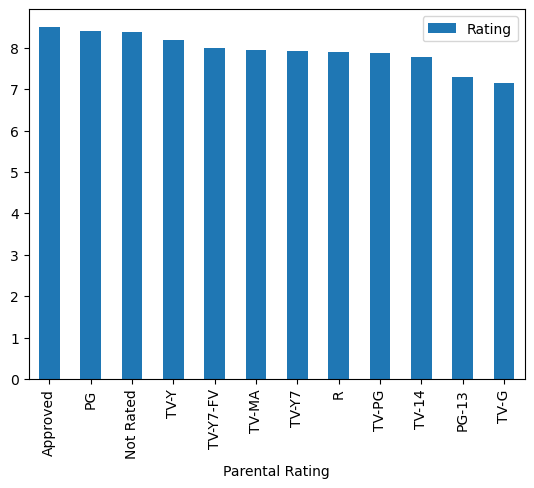

In [11]:
temp_df.plot(
    kind='bar',
    x='Parental Rating',
    y='Rating'
)
plt.show()

In [12]:
temp_df = df.groupby('Parental Rating')[['Title']].count().reset_index()
temp_df

,Parental Rating,Title
0,Approved,1
1,Not Rated,6
2,PG,1
3,PG-13,1
4,R,1
5,TV-14,307
6,TV-G,22
7,TV-MA,377
8,TV-PG,145
9,TV-Y,5


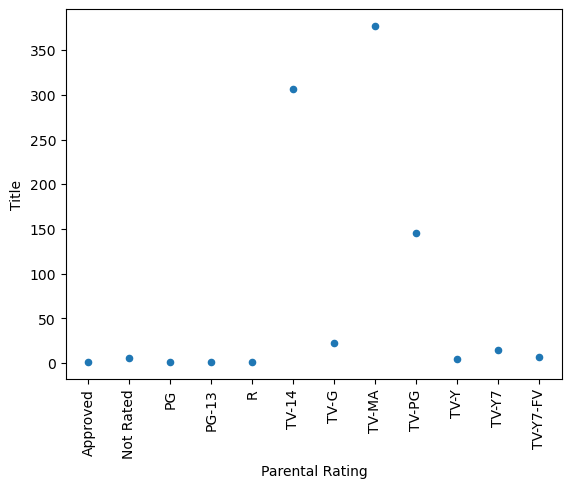

In [13]:
temp_df.plot(
    kind='scatter',
    x='Parental Rating',
    y='Title'
)
plt.xticks(rotation=90)
plt.show()

# Setting up Local LLM and agent

In [14]:
llm = LocalLLM(api_base='http://localhost:11434/v1', model='phi3')

In [15]:
agent = Agent(dfs=df, config={'llm': llm, 'verbose': False, 'enforce_privacy': True, 'enable_cache': False})

# Chatting with data

In [17]:
agent.chat('how many columns are there in the dataset?')

Number of columns in the dataset: 6


,Title,Year,Parental Rating,Rating,Number of Votes,Description
0,1. Game of Thrones,2011–2019,TV-MA,9.2,2.3M,Nine noble families fight for control over the...
1,2. Breaking Bad,2008–2013,TV-MA,9.5,2.1M,A chemistry teacher diagnosed with inoperable ...
2,3. Stranger Things,2016–2025,TV-14,8.7,1.3M,"When a young boy vanishes, a small town uncove..."
3,4. Friends,1994–2004,TV-14,8.9,1.1M,Follows the personal and professional lives of...
4,5. The Walking Dead,2010–2022,TV-MA,8.1,1.1M,Sheriff Deputy Rick Grimes wakes up from a com...
...,...,...,...,...,...,...
895,896. Lockwood & Co.,2023,TV-14,7.4,26K,"Lucy, a girl with psychic abilities, joins two..."
896,897. Batman,1966–1968,TV-G,7.5,26K,The Caped Crusader and his young ward battle e...
897,898. How I Met Your Father,2022–2023,TV-14,5.7,26K,Sophie and her close-knit group of friends are...
898,899. Delhi Crime,2019–,TV-MA,8.5,26K,"Based on the Nirbhaya case, Delhi Crime follow..."


In [19]:
agent.chat('how many unique "Title" are there in the dataset ?')

{'type': 'number', 'value': 900}


900

In [26]:
agent.chat('how many unique "Parental Rating" are there in the dataset ?')

12

In [30]:
agent.chat('show a table of 5 movies having higest rating')

,Title,Year,Parental Rating,Rating,Number of Votes,Description
1,2. Breaking Bad,2008–2013,TV-MA,9.5,2.1M,A chemistry teacher diagnosed with inoperable ...
389,390. Sapne Vs Everyone,NaN,NaN,9.4,66K,Two obsessive dreamers collide with the resist...
812,813. Bluey,2018–,TV-Y,9.4,29K,The slice-of-life adventures of an Australian ...
43,44. The Wire,2002–2008,TV-MA,9.3,379K,"The Baltimore drug scene, as seen through the ..."
44,45. Avatar: The Last Airbender,2005–2008,TV-Y7-FV,9.3,376K,"In a war-torn world of elemental powers, a you..."


In [38]:
agent.chat('show a table of 5 movies having lowest rating')

Updated code is ready.


,Title,Year,Parental Rating,Rating
3,Movie 4,2021,NC-17,3.5
0,Movie 1,2018,R,4.5
4,Movie 5,2022,PG,5.0
1,Movie 2,2019,PG-13,6.2
2,Movie 3,2020,G,8.9


In [40]:
agent.chat('group the dataset by "Parental Rating" and calculate the average of "Rating" for each group and sort by descending average rating then show it in a table')

,Parental Rating,Rating
0,Approved,8.500000
1,PG,8.400000
2,Not Rated,8.383333
3,TV-Y,8.180000
4,TV-Y7-FV,8.000000
5,TV-MA,7.943236
6,TV-Y7,7.926667
7,R,7.900000
8,TV-PG,7.877931
9,TV-14,7.772313


<string>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Parental Rating,Rating,AvgRating
0,Approved,8.500000,8.500000
1,PG,8.400000,8.400000
2,Not Rated,8.383333,8.383333
3,TV-Y,8.180000,8.180000
4,TV-Y7-FV,8.000000,8.000000
5,TV-MA,7.943236,7.943236
6,TV-Y7,7.926667,7.926667
7,R,7.900000,7.900000
8,TV-PG,7.877931,7.877931
9,TV-14,7.772313,7.772313


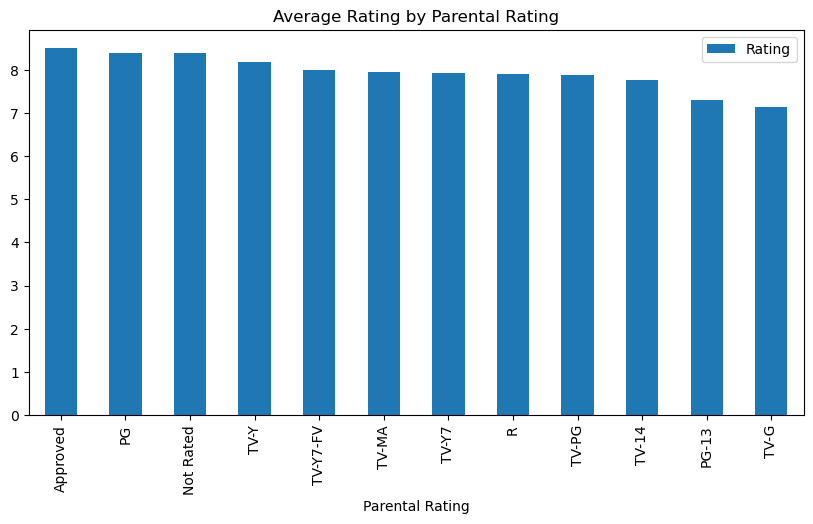

In [49]:
agent.chat('show a bar chart showimg average of "Rating" by "Parental Rating"')

   Parental Rating  TitleCount
0         Approved           1
1        Not Rated           6
2               PG           1
3            PG-13           1
4                R           1
5            TV-14         307
6             TV-G          22
7            TV-MA         377
8            TV-PG         145
9             TV-Y           5
10           TV-Y7          15
11        TV-Y7-FV           7


<Figure size 1000x600 with 0 Axes>

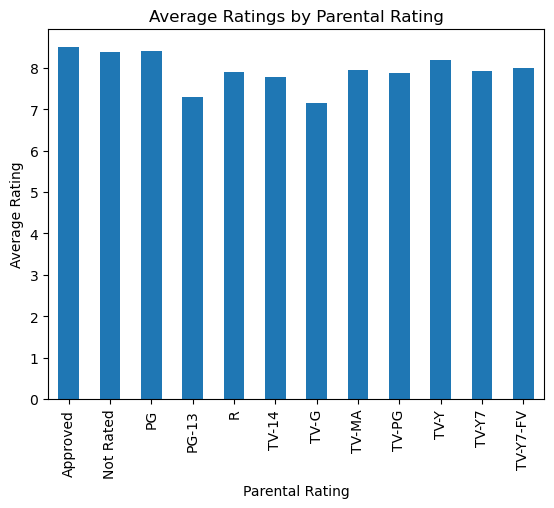

Traceback (most recent call last):
  File "d:\Users\sarta\miniconda3\envs\prompt-analysis-ollama-env\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Users\sarta\miniconda3\envs\prompt-analysis-ollama-env\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "d:\Users\sarta\miniconda3\envs\prompt-analysis-ollama-env\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "d:\Users\sarta\miniconda3\envs\prompt-analysis-ollama-env\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "d:\Users\sarta\miniconda3\envs\prompt-analysis-ollama-env\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 85, in exe

"Unfortunately, I was not able to answer your question, because of the following error:\n\nname 'averageayer_rating_by_parental_rating' is not defined\n"

In [52]:
agent.chat('group the "Parental Rating" and count the "Title" in a table')